# The Gaussian similarity function

## Perform standard imports 

In [1]:
from figures import *
import numpy as np
from random import uniform, seed

from sklearn.cluster import KMeans

## Generate the data

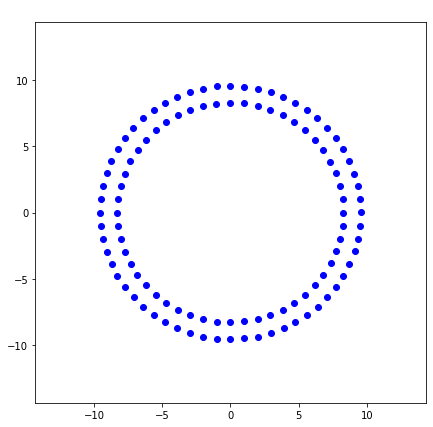

In [2]:
data = données(26, 0.01)
plt.figure(figsize=(7,7))
tracer(data)

## Similarity graph

In [3]:
def Gaussian_Similary(x1, x2, sigma):
    dist = np.linalg.norm(x1 - x2)
    return np.exp(-dist**2/(2*sigma**2))

## The fully connected graph

In [4]:
def fully_connected_graph(data, sigma) :
    X = np.array(data)
    n = len(data)
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i!=j: 
                S[i,j] = Gaussian_Similary(X[i], X[j], sigma)
    return S

## Spectral Clustering

In [5]:
def Spectral_Clustering(data, k, sigma) : 
    n = len(data)
    W = fully_connected_graph(data, sigma) # Weighted matrix
    D = np.zeros((n, n)) # Degree matrix 
    for i in range(n):
        D[i,i] = sum(W[i, :])
    L = D - W # Laplacien matrix 
    L_rw = np.dot(np.linalg.inv(D), L) # the generalized eigenvectors of L => the eigenvectors of L_rw
    eig_vals, eig_vecs = np.linalg.eig(L_rw) # Eigenvalue and its eigenvector
    sorted_eig_vals = np.argsort(eig_vals)[:k]
    U = eig_vecs[:,sorted_eig_vals] # the first k generalized eigenvectors as columns   
    rows = [U[i, :] for i in range(n)]
    Kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1).fit(rows) # Apply kmeans 
    labels = Kmeans.labels_ 
    #centers = Kmeans.cluster_centers_
    return labels

## Examples

### 2 Classes

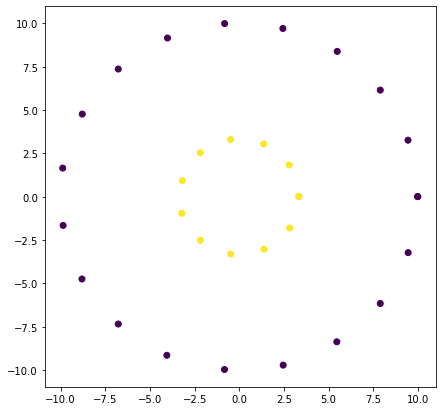

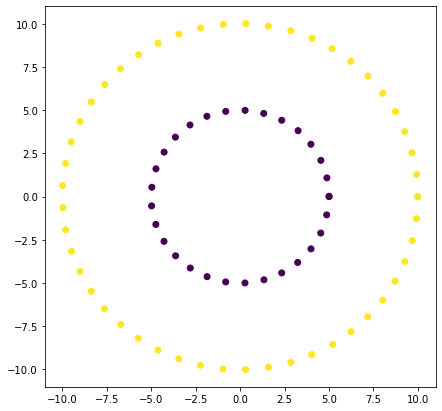

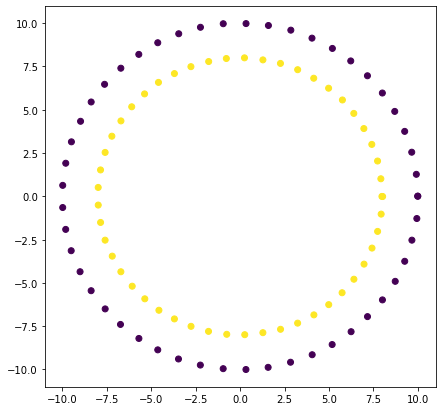

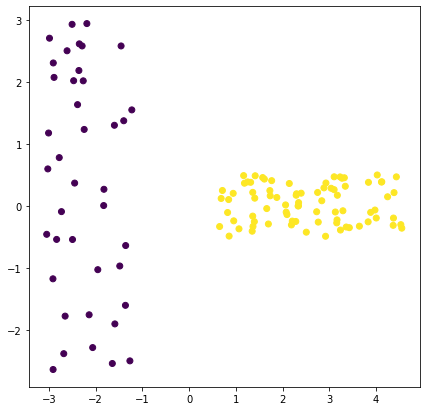

In [6]:
#figures = [20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 40, 41, 80, 81, 82]
figures = [20, 21, 22, 23]
for figure in figures :
    data = données(figure, 0.01)
    labels = Spectral_Clustering(data, 2, 0.2)
    X = np.array(data)
    plt.figure(figsize=(7,7))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.show()

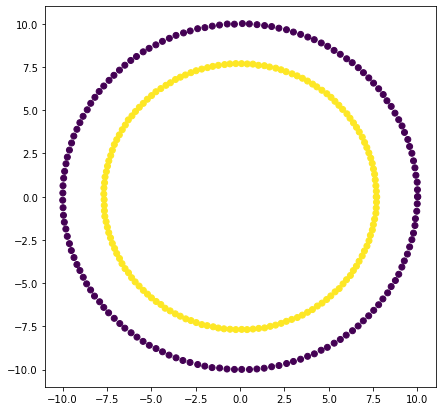

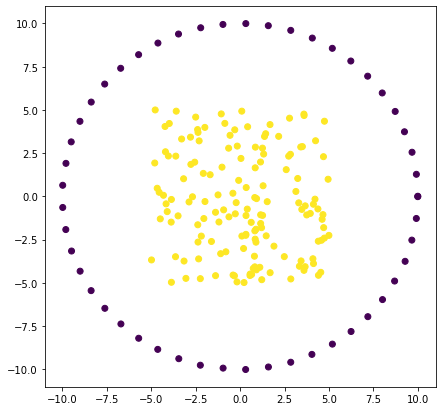

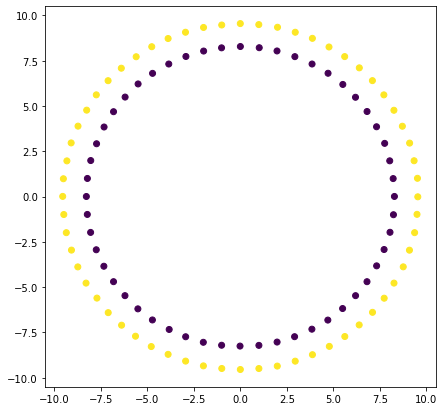

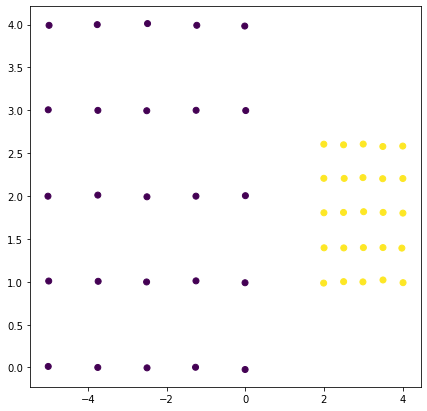

In [7]:
#figures = [20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 40, 41, 80, 81, 82]
figures = [24, 25, 26, 27]
for figure in figures :
    data = données(figure, 0.01)
    labels = Spectral_Clustering(data, 2, 0.2)
    X = np.array(data)
    plt.figure(figsize=(7,7))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.show()

### 3 Classes

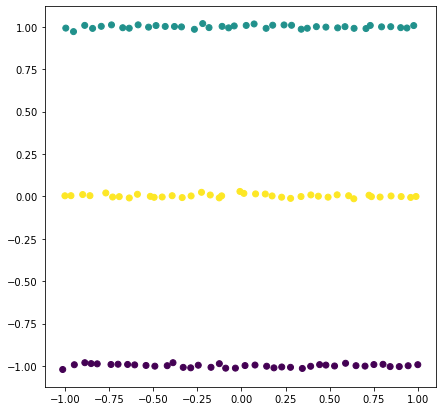

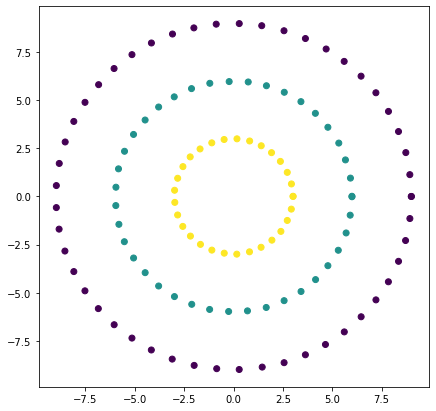

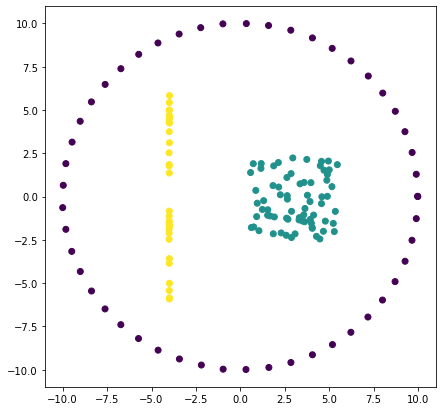

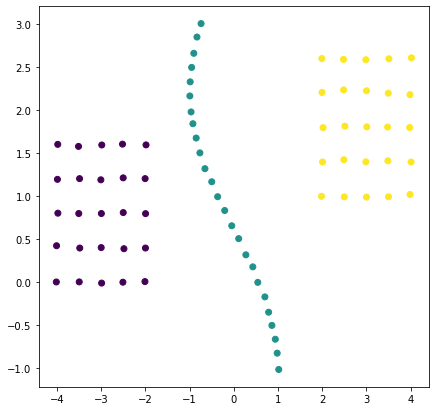

In [8]:
#figures = [20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 40, 41, 80, 81, 82]
figures = [30, 31, 32, 33]
for figure in figures :
    data = données(figure, 0.01)
    labels = Spectral_Clustering(data, 3, 0.3)
    X = np.array(data)
    plt.figure(figsize=(7,7))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.show()

### 4 Classes 

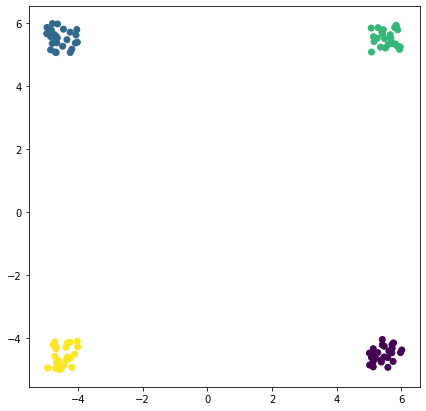

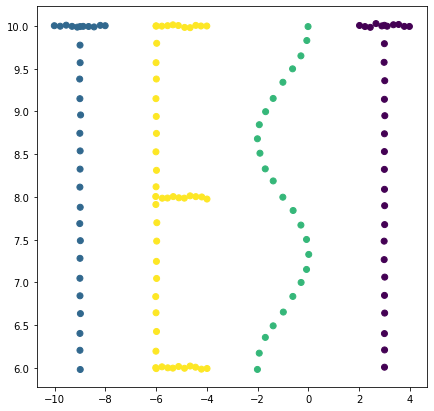

In [9]:
#figures = [20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 40, 41, 80, 81, 82]
figures = [40, 41]
for figure in figures :
    data = données(figure, 0.01)
    labels = Spectral_Clustering(data, 4, 0.2)
    X = np.array(data)
    plt.figure(figsize=(7,7))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.show()

### 8 Classes

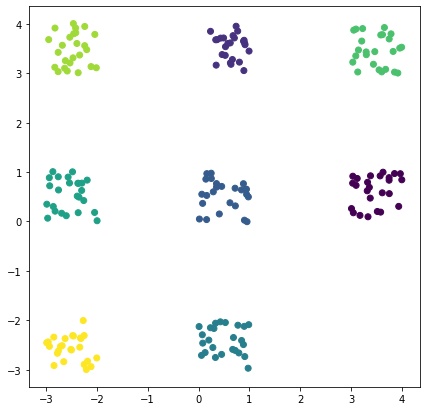

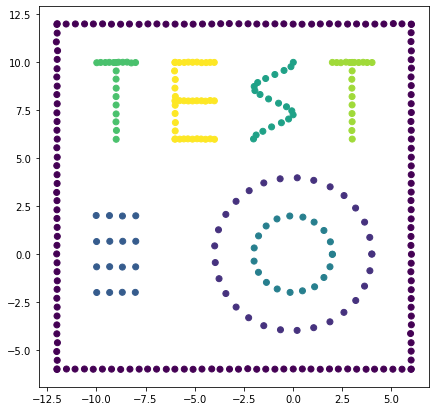

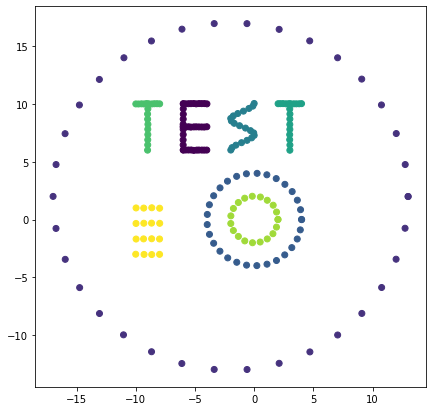

In [10]:
#figures = [20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 40, 41, 80, 81, 82]
figures = [80, 81, 82]
for figure in figures :
    data = données(figure, 0.01)
    labels = Spectral_Clustering(data, 8, 0.4)
    X = np.array(data)
    plt.figure(figsize=(7,7))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.show()

# The p-value similarity function

In [11]:
from scipy.stats import ncx2
from random import uniform

In [12]:
def estimate_beta(pts, M):
    
    #estimate the parameter beta for each point
    n = len(pts)
    res = []
    distances = [[] for i in range(n)]
    for i in range(n):
        xi = pts[i]
        for j in range(n):
            
            xj = pts[j]
            distances[i].append(np.linalg.norm(xi - xj))
                
        distances[i] = sorted(distances[i])[:M]
        res.append(mean(distances[i]))
        
    return res

In [13]:
def pvalue(i, j, points, beta):
    
    tauij = min(beta[i], beta[j])
    sigmaij = np.sqrt(list_sigma[i]**2 + list_sigma[j]**2)
    #sigmaij = np.sqrt(2)*0.2
    b = np.linalg.norm(points[i] - points[j])/sigmaij
    a = tauij/sigmaij
    #w = ncx2.sf(b,1,a) #Q_d/2(a,b)
    w = ncx2.sf(b**2, 1, a**2)
    return w

In [14]:
def pvalue_graph(data, beta):
    n = len(data)
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i!=j: 
                S[i,j] = pvalue(i,j,data,beta)
    return S

In [15]:
def Spectral_Clustering_pvalue(data, k, M):
    
    n = len(data)
    points = np.array(data)
    beta = estimate_beta(points, M)
    
    W = pvalue_graph(points, beta)
    D = np.zeros((n, n)) # Degree matrix 
    for i in range(n):
        D[i,i] = sum(W[i, :])

    L = D - W # Laplacien matrix 
    L_rw = np.dot(np.linalg.inv(D), L) # the generalized eigenvectors of L => the eigenvectors of L_rw

    eig_vals, eig_vecs = np.linalg.eig(L_rw) # Eigenvalue and its eigenvector
    sorted_eig_vals = np.argsort(eig_vals)[:k]
    U = eig_vecs[:,sorted_eig_vals] # the first k generalized eigenvectors as columns 

    rows = [U[i, :] for i in range(n)]
    Kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1).fit(rows) # Apply kmeans 
    labels = Kmeans.labels_
    return labels

# Example

## Noiseless Data

### Gaussian Similarity Function

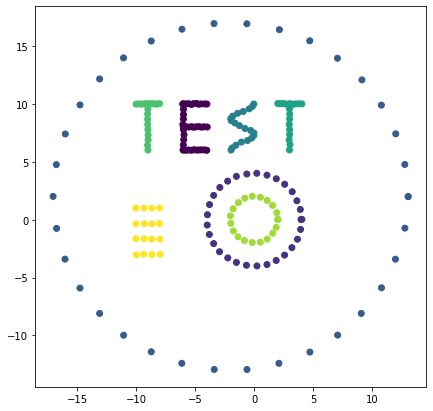

In [17]:
n = len(données(82, 0.01))
list_sigma = [0.02 for i in range(n)]
data = données_bl(82, list_sigma)
labels = Spectral_Clustering(data, 8, 0.4)
X = np.array(data)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

### p-value Function

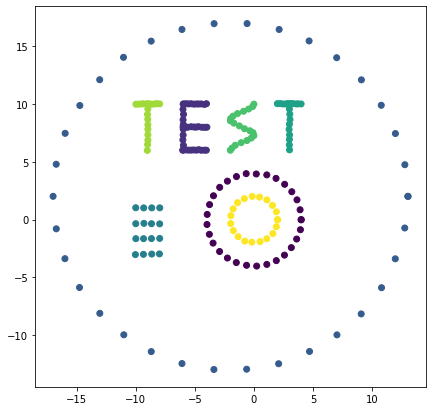

In [18]:
seed(1)
n = len(données(82, 0.01))
list_sigma = [0.02 for i in range(n)]
data = données_bl(82, list_sigma)
labels = Spectral_Clustering_pvalue(data, 8, 10)
X = np.array(data)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

## Noisy Data

### Gaussian Similarity Function

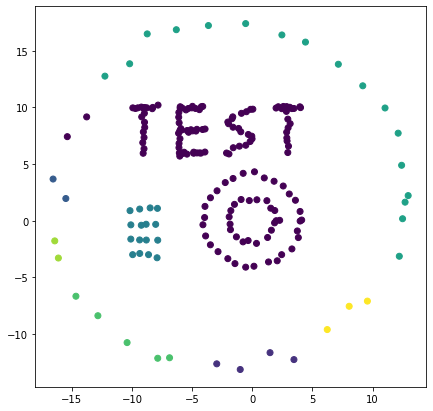

In [19]:
n = len(données(82, 0.01))
list_sigma = [0.1 for _ in range(160)] + [0.2 for _ in range(16)] + [0.7 for _ in range(25)]
data = données_bl(82, list_sigma)
labels = Spectral_Clustering(data, 8, 0.5)
X = np.array(data)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

### p-value Function

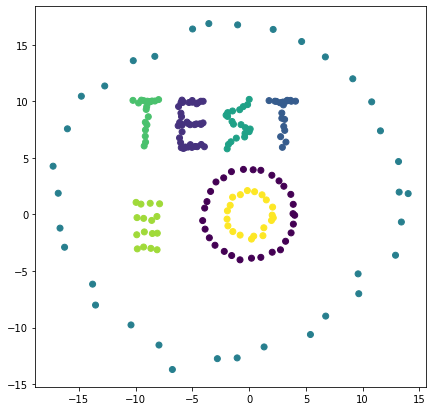

In [20]:
seed(2)
n = len(données(82, 0.01))
list_sigma = [0.1 for _ in range(160)] + [0.2 for _ in range(16)] + [0.7 for _ in range(25)]
data = données_bl(82, list_sigma)
labels = Spectral_Clustering_pvalue(data, 8, 7)
X = np.array(data)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()